In [1]:

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

# from keras.models import load_model
# from keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.text import Tokenizer
# from textblob import TextBlob
# from gensim.models import KeyedVectors
# import gensim.downloader as api

In [4]:
%ls

client_secret_911564495268-a9p038ssrepu16svfh5a4ni8eccg6vbq.apps.googleusercontent.com.json
F1_analysis.ipynb
__init__.py
SentimentAnalysisV0.ipynb
SentimentPrediction.ipynb
settings.yaml
Test.ipynb


In [3]:
def generate_dl_sentiment_scores(texts):
    def get_sentiment_score(text):
        blob = TextBlob(text)
        return blob.sentiment.polarity

    sentiment_scores = np.array([get_sentiment_score(text) for text in texts])
    return sentiment_scores

def generate_dl_word_embeddings(texts):
    # word2vec_model_path = 'word2vec_data/GoogleNews-vectors-negative300.bin'
    # word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)
    word2vec_model = api.load('word2vec-google-news-300')

    def get_avg_word2vec_vector(text, model, vector_size):
        words = text.split()
        word_vectors = [model[word] for word in words if word in model]
        if len(word_vectors) == 0:
            return np.zeros(vector_size)
        else:
            return np.mean(word_vectors, axis=0)

    vector_size = 300  # Size of the Word2Vec vectors in the Google News model
    word2vec_features = np.array([get_avg_word2vec_vector(text, word2vec_model, vector_size) for text in texts])
    
    return word2vec_features

In [4]:
preprocessed_data_path = 'work/data/preprocessed_F1_tweets.csv'
encode = 'Utf8'
df = pd.read_csv(preprocessed_data_path, encoding=encode, low_memory=False)
texts = df['preprocessed_text'].to_list()

In [5]:
max_words = 10000
max_len=100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word2vec_features = generate_dl_word_embeddings(texts)
sentiment_scores = generate_dl_sentiment_scores(texts)
X_sequences = pad_sequences(sequences, maxlen=max_len)

KeyboardInterrupt: 

In [ ]:

model_path = 'work/data/models/LSTM_model.keras'
model = load_model(model_path)

In [ ]:
y_pred = model.predict([X_sequences, word2vec_features, sentiment_scores])
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

2023-11-12 16:59:20.151330: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 758865600 exceeds 10% of free system memory.


19763/19763 [==============================] - 753s 38ms/step


In [ ]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
df['LSTM_pred'] = y_pred
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,preprocessed_text,LSTM_pred
0,Zack Shephard,NaN,My opinions are mine ALONE. Venting is the onl...,2011-12-03 20:36:55,89.0,2598,212886,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone,False,next great hashtag f1 duo mention espnf1 co wm...,1
1,Matteo Vannucci,NaN,"Free speech, free ideas, random thoughts",2010-05-28 01:02:32,10.0,40,8,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone,False,mention f1 hamilton would gone pit empty grid ...,1
2,Michelle,The Burbs,"likes- movies, candy, being lazy, formula 1, ...",2009-03-04 16:53:13,231.0,110,428,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android,False,tiring hashtag f1 day co 34ggwgalt6,1
3,JoshWFC 🇧🇷,NaN,| JP10’s biggest fan | pronouns : João/Pedro |...,2021-04-05 16:14:53,156.0,443,2994,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone,False,valteri bottass tracking max verstappen way ho...,1
4,Ria Tagulinao,MNL,Fun-sized Filipina writer @Medium,2009-06-22 16:08:51,833.0,379,30891,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone,False,word describe hashtag hungariangp say fantasti...,0
5,Abi,NaN,🏎 ♿️,2015-06-26 20:52:32,291.0,686,76158,False,2021-08-01 23:56:41,SEB SAID LGBTQ+ RIGHTS!! #F1 #LGBTQ https://t....,"['F1', 'LGBTQ']",Twitter for Android,False,seb said lgbtq+ right hashtag f1 hashtag lgbtq...,1
6,cat1128,NaN,NaN,2014-03-09 16:14:03,22.0,37,13,False,2021-08-01 23:56:19,Do they remove Ocon too? Ham to be first.\nThi...,"['SebastianVettel', 'EstebanOcon', 'f1', 'Hung...",Twitter for iPhone,False,remove ocon ham first grand prix mercedes merc...,1
7,NMM,Canada,NaN,2010-09-16 18:48:19,58.0,334,983,False,2021-08-01 23:55:18,Breaking news FIA has disqualified @OconEsteb...,"['F1', 'HungaryGP', 'BREAKINGNEWS', 'FIA']",Twitter for iPhone,False,breaking news fia disqualified mention oconest...,1
8,Al Rowell,"South Georgia, USA",Proud Georgia Democrat committed to public edu...,2008-12-23 22:29:13,1416.0,2035,15833,False,2021-08-01 23:54:25,"VIDEO—""They can disqualify me if they want""-Se...","['LGBT', 'HungarianGP', 'F1']",Twitter for iPhone,False,video disqualify want sebastian vettel wore lo...,0
9,Downforce Radio 🧡,UK,"24/7 radio and videos from F1 to club racing, ...",2013-02-06 22:19:29,3860.0,2995,2295,False,2021-08-01 23:54:08,#NowPlaying on https://t.co/5L1U2uVCQV Downfor...,"['NowPlaying', 'radio', 'motorsport', 'f1', 'b...",Radio King LiveTweet,False,hashtag nowplaying co 5l1u2uvcqv downforce rad...,1


In [ ]:
feature_matrix_path = 'work/data/feature_matrix_f1.pkl'
feature_matrix = joblib.load(feature_matrix_path)

In [ ]:
model_path = 'work/data/models/Logistic Regression_model.pkl'
model = joblib.load(open(model_path, 'rb'))
y_pred = model.predict(feature_matrix)

In [ ]:
df['LR_pred'] = y_pred
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,preprocessed_text,LSTM_pred,LR_pred
0,Zack Shephard,NaN,My opinions are mine ALONE. Venting is the onl...,2011-12-03 20:36:55,89.0,2598,212886,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone,False,next great hashtag f1 duo mention espnf1 co wm...,1,1
1,Matteo Vannucci,NaN,"Free speech, free ideas, random thoughts",2010-05-28 01:02:32,10.0,40,8,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone,False,mention f1 hamilton would gone pit empty grid ...,1,0
2,Michelle,The Burbs,"likes- movies, candy, being lazy, formula 1, ...",2009-03-04 16:53:13,231.0,110,428,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android,False,tiring hashtag f1 day co 34ggwgalt6,1,1
3,JoshWFC 🇧🇷,NaN,| JP10’s biggest fan | pronouns : João/Pedro |...,2021-04-05 16:14:53,156.0,443,2994,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone,False,valteri bottass tracking max verstappen way ho...,1,0
4,Ria Tagulinao,MNL,Fun-sized Filipina writer @Medium,2009-06-22 16:08:51,833.0,379,30891,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone,False,word describe hashtag hungariangp say fantasti...,0,1
5,Abi,NaN,🏎 ♿️,2015-06-26 20:52:32,291.0,686,76158,False,2021-08-01 23:56:41,SEB SAID LGBTQ+ RIGHTS!! #F1 #LGBTQ https://t....,"['F1', 'LGBTQ']",Twitter for Android,False,seb said lgbtq+ right hashtag f1 hashtag lgbtq...,1,0
6,cat1128,NaN,NaN,2014-03-09 16:14:03,22.0,37,13,False,2021-08-01 23:56:19,Do they remove Ocon too? Ham to be first.\nThi...,"['SebastianVettel', 'EstebanOcon', 'f1', 'Hung...",Twitter for iPhone,False,remove ocon ham first grand prix mercedes merc...,1,0
7,NMM,Canada,NaN,2010-09-16 18:48:19,58.0,334,983,False,2021-08-01 23:55:18,Breaking news FIA has disqualified @OconEsteb...,"['F1', 'HungaryGP', 'BREAKINGNEWS', 'FIA']",Twitter for iPhone,False,breaking news fia disqualified mention oconest...,1,1
8,Al Rowell,"South Georgia, USA",Proud Georgia Democrat committed to public edu...,2008-12-23 22:29:13,1416.0,2035,15833,False,2021-08-01 23:54:25,"VIDEO—""They can disqualify me if they want""-Se...","['LGBT', 'HungarianGP', 'F1']",Twitter for iPhone,False,video disqualify want sebastian vettel wore lo...,0,1
9,Downforce Radio 🧡,UK,"24/7 radio and videos from F1 to club racing, ...",2013-02-06 22:19:29,3860.0,2995,2295,False,2021-08-01 23:54:08,#NowPlaying on https://t.co/5L1U2uVCQV Downfor...,"['NowPlaying', 'radio', 'motorsport', 'f1', 'b...",Radio King LiveTweet,False,hashtag nowplaying co 5l1u2uvcqv downforce rad...,1,1


In [ ]:
df['dif'] = df['LSTM_pred'] - df['LR_pred']
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,preprocessed_text,LSTM_pred,LR_pred,dif
0,Zack Shephard,NaN,My opinions are mine ALONE. Venting is the onl...,2011-12-03 20:36:55,89.0,2598,212886,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone,False,next great hashtag f1 duo mention espnf1 co wm...,1,1,0
1,Matteo Vannucci,NaN,"Free speech, free ideas, random thoughts",2010-05-28 01:02:32,10.0,40,8,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone,False,mention f1 hamilton would gone pit empty grid ...,1,0,1
2,Michelle,The Burbs,"likes- movies, candy, being lazy, formula 1, ...",2009-03-04 16:53:13,231.0,110,428,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android,False,tiring hashtag f1 day co 34ggwgalt6,1,1,0
3,JoshWFC 🇧🇷,NaN,| JP10’s biggest fan | pronouns : João/Pedro |...,2021-04-05 16:14:53,156.0,443,2994,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone,False,valteri bottass tracking max verstappen way ho...,1,0,1
4,Ria Tagulinao,MNL,Fun-sized Filipina writer @Medium,2009-06-22 16:08:51,833.0,379,30891,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone,False,word describe hashtag hungariangp say fantasti...,0,1,-1
5,Abi,NaN,🏎 ♿️,2015-06-26 20:52:32,291.0,686,76158,False,2021-08-01 23:56:41,SEB SAID LGBTQ+ RIGHTS!! #F1 #LGBTQ https://t....,"['F1', 'LGBTQ']",Twitter for Android,False,seb said lgbtq+ right hashtag f1 hashtag lgbtq...,1,0,1
6,cat1128,NaN,NaN,2014-03-09 16:14:03,22.0,37,13,False,2021-08-01 23:56:19,Do they remove Ocon too? Ham to be first.\nThi...,"['SebastianVettel', 'EstebanOcon', 'f1', 'Hung...",Twitter for iPhone,False,remove ocon ham first grand prix mercedes merc...,1,0,1
7,NMM,Canada,NaN,2010-09-16 18:48:19,58.0,334,983,False,2021-08-01 23:55:18,Breaking news FIA has disqualified @OconEsteb...,"['F1', 'HungaryGP', 'BREAKINGNEWS', 'FIA']",Twitter for iPhone,False,breaking news fia disqualified mention oconest...,1,1,0
8,Al Rowell,"South Georgia, USA",Proud Georgia Democrat committed to public edu...,2008-12-23 22:29:13,1416.0,2035,15833,False,2021-08-01 23:54:25,"VIDEO—""They can disqualify me if they want""-Se...","['LGBT', 'HungarianGP', 'F1']",Twitter for iPhone,False,video disqualify want sebastian vettel wore lo...,0,1,-1
9,Downforce Radio 🧡,UK,"24/7 radio and videos from F1 to club racing, ...",2013-02-06 22:19:29,3860.0,2995,2295,False,2021-08-01 23:54:08,#NowPlaying on https://t.co/5L1U2uVCQV Downfor...,"['NowPlaying', 'radio', 'motorsport', 'f1', 'b...",Radio King LiveTweet,False,hashtag nowplaying co 5l1u2uvcqv downforce rad...,1,1,0


In [ ]:
def calculate_difference(row):
    if row['LSTM_pred'] == 1 and row['LR_pred'] == 1:
        return 1
    elif row['LSTM_pred'] == 0 and row['LR_pred'] == 0:
        return 0
    elif row['LR_pred'] == 1 and row['LSTM_pred'] == 0:
        return -1
    elif row['LSTM_pred'] == 1 and row['LR_pred'] == 0:
        return 2
    else:
        return None

df['dif_map'] = df.apply(calculate_difference, axis=1)

In [6]:
encode = 'Utf8'
df_sort = pd.read_csv('../../data/F1_tweets_sentiment.csv', encoding=encode, low_memory=False)
lstm_preds = df_sort['LSTM_pred'].values
lr_preds = df_sort['LR_pred'].values

0
100k
200k
300k
400k
500k


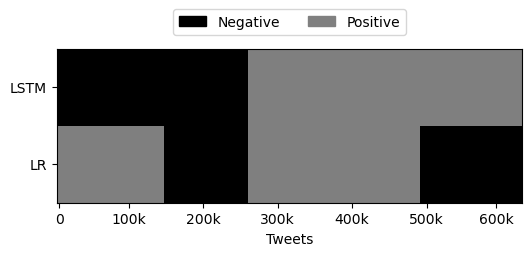

In [20]:
n = len(lstm_preds)
max_width = 100

factor = int(np.ceil(n / max_width))
preds_model_1 = lstm_preds[::factor]
preds_model_2 = lr_preds[::factor]
n = len(preds_model_1) 

img = np.zeros((2, n))
img[0, :] = preds_model_1
img[1, :] = preds_model_2

colors = [(0, 0, 0), (0.5, 0.5, 0.5)]  # RGB for black and grey
n_bins = [0, 1]  # Discrete bins for black and grey
cmap = LinearSegmentedColormap.from_list("custom_gray", list(zip(n_bins, colors)))

plt.figure(figsize=(6, 2))  
plt.imshow(img, cmap=cmap, aspect='auto')
plt.yticks([0,1], ['LSTM', 'LR'])
tick_interval = 100000
original_indices = np.arange(0, n * factor, tick_interval)
downsampled_ticks = original_indices // factor
scaled_ticks = []

i = 0
for d in original_indices:
    if d == 0:
        scaled_ticks.append('0')
        continue
    scaled_ticks.append(str((i+1)*100) + 'k')
    print(scaled_ticks[i])
    i+=1
    
plt.xticks(downsampled_ticks, scaled_ticks, rotation=0)
plt.xlabel('Tweets')

black_patch = mpatches.Patch(color='black', label='Negative')
white_patch = mpatches.Patch(color='grey', label='Positive')
plt.legend(handles=[black_patch, white_patch], loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

plt.show()

In [22]:
df_sort.dif_map.value_counts()

 1    233582
-1    142045
 2    141007
 0    115754
Name: dif_map, dtype: int64

In [ ]:
len(lstm_preds)

632388

In [93]:
df_sort.to_csv('work/data/F1_tweets_sentiment.csv', encoding=encode)

## Results

- Agreement (Negative): The LSTM and Logistic Regression models both predicted negative sentiment for 142,045 instances.
- Agreement (Positive): Both models agreed on a positive sentiment for 115,754 instances.
- LR Positive / LSTM Negative: There were 233,582 instances where the Logistic Regression model predicted a positive sentiment but the LSTM model predicted negative.
- LSTM Positive / LR Negative: There were 141,007 instances where the LSTM model predicted a positive sentiment but the Logistic Regression model predicted negative.

### LSTM Model
- Negative Sentiment: 257,799 instances
- Positive Sentiment: 374,589 instances

### Logistic Regression Model
- Negative Sentiment: 256,761 instances
- Positive Sentiment: 375,627 instances


In [106]:
df_sort['date'] = pd.to_datetime(df_sort['date']) - pd.to_timedelta(7, unit='d')
df_sort.info(verbose=True, null_counts=True)

ParserError: Unknown string format: ['F1', 'QatarGP'] present at position 39018

In [110]:
df['date']

0         2021-08-01 23:59:18
1         2021-08-01 23:59:10
2         2021-08-01 23:58:48
3         2021-08-01 23:58:11
4         2021-08-01 23:57:40
                 ...         
632383    2022-08-20 22:18:08
632384    2022-08-20 22:17:35
632385    2022-08-20 22:16:05
632386    2022-08-20 22:11:04
632387    2022-08-20 22:10:27
Name: date, Length: 632388, dtype: object

In [ ]:
def is_valid_date(val):
    try:
        pd.to_datetime(val, format='%Y-%m-%d %H:%M:%S')
        return True
    except ValueError:
        return False

# Apply this function to your 'date' column
df['is_valid_date'] = df['date'].apply(is_valid_date)

# Filter rows where 'date' is not a valid date
non_date_entries = df[~df['is_valid_date']]

# If you want to see these non-date entries
print(non_date_entries['date'])

                                                user_name  \
199943                                           #TeamPsg   
213267                     Link ➡️https://t.co/WpePiMd8qs   
276116                                         Arsenal FC   
503588  toutes les batailles que le temps me force jou...   

              user_location user_description user_created  user_followers  \
199943  2012-02-11 20:32:27              372          335         12710.0   
213267  2021-10-29 05:43:10                0            2             4.0   
276116  2011-04-01 10:54:01            632.0          672          4909.0   
503588  2009-08-24 08:20:16            158.0           57           217.0   

       user_friends      user_favourites  \
199943        False  2021-11-08 15:40:27   
213267        False  2021-11-07 15:21:13   
276116        False  2021-11-21 15:33:41   
503588        False  2022-01-14 09:33:11   

                                            user_verified                date  \
199943

In [112]:
print(non_date_entries['date'])

199943                ['F1']
213267    ['MexicoGP', 'F1']
276116     ['F1', 'QatarGP']
503588                ['F1']
Name: date, dtype: object
